# Contrast Enhancement on a Low Contrast Image

This notebook looks into demonstrating image contrast enhancement process on a low contrast image with python. The image used in this notebook is taken from Pinterest and saved to my personal repository on [GitHub](https://github.com/dzniel/binus-computer-vision-course/blob/main/image/mirage.png).

Before anything, we should first setup the environment.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow as cv_imshow

Now we can use `skimage.io` to load our raw image URL.

In [2]:
image = io.imread("https://github.com/dzniel/binus-computer-vision-course/blob/main/image/mirage.png?raw=true")
image.shape

(563, 910, 4)

From the shape above, we can see that our image consists of:
* 563 rows
* 910 columns
* 4 color channels

We can use `cv_imshow` that is imported to take a look at our image. 


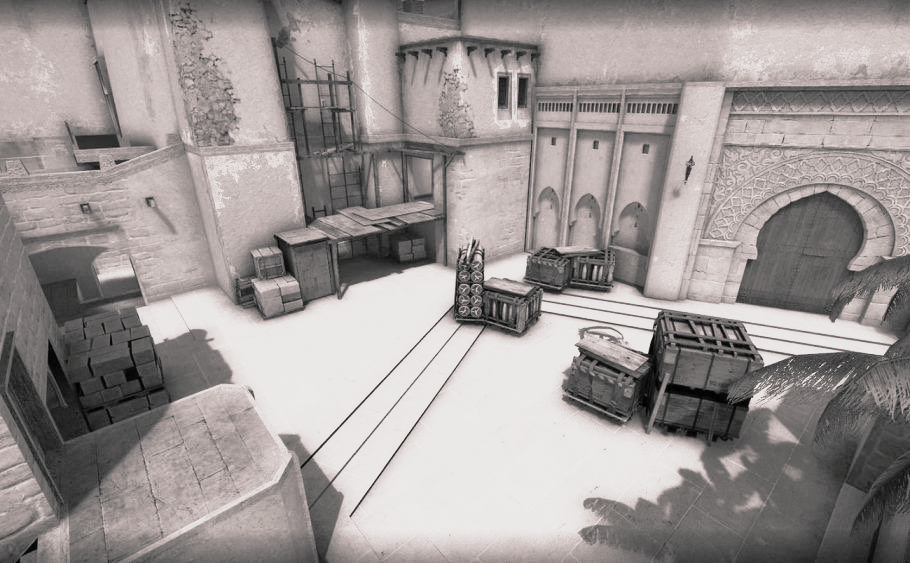

In [3]:
cv_imshow(image)

Now it makes sense how our image contains 4 color channels, our image doesn't seem to be just black and white from the get-go. Since we want to perform an intensity level slicing, we would need to convert our image to gray.

In [4]:
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image.shape

(563, 910)

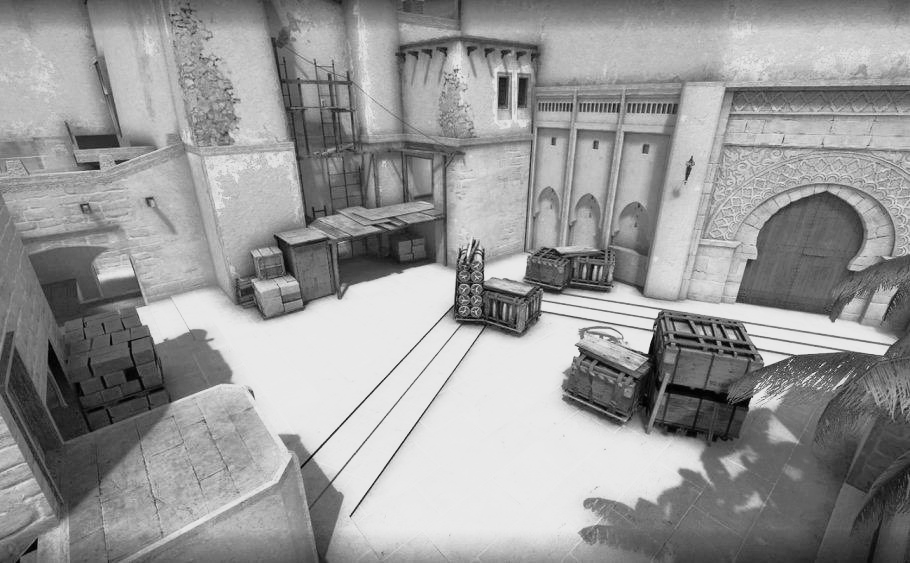

In [5]:
cv_imshow(image)

Now our image should be ready for experimentation. Another thing is we want to check whether our image has a good or bad contrast with the help of histogram visualization.



In [6]:
def plot_histogram(image, name):
  intensity = np.zeros(256, dtype=int)
  height = image.shape[0]
  width = image.shape[1]

  for i in range(height):
    for j in range(width):
      intensity[image[i][j]] += 1
      
  plt.plot(intensity)
  plt.title(name)
  plt.xlabel("intensity")
  plt.ylabel("frequency")
  plt.show()

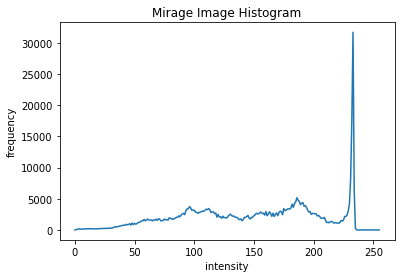

In [7]:
plot_histogram(image, "Mirage Image Histogram")

We can identify that the image has low exposure but a quite good spread for its intensity values. Moreover, there is also a large difference between minimum and maximum intensity value which indicates that the image actually has a decent contrast. However, we will still try to enhance the image constrast with two experimentations.

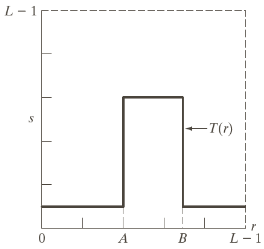

For the first experimentation, we will try to highlight a certain range in between $[A, B]$ as shown on the associated figure above and reduces all the other intensity for our image.

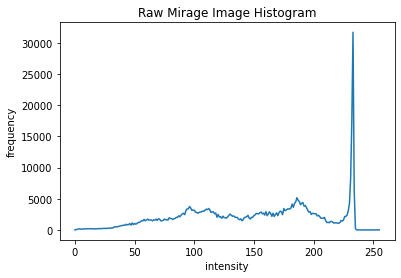

In [8]:
sliced_image = image.copy()
height = sliced_image.shape[0]
width = sliced_image.shape[1]

for i in range(height):
  for j in range(width):
    pixel = sliced_image[i][j]
    if pixel >= 100 and pixel <= 200:
      sliced_image[i][j] = 255
    else:
      sliced_image[i][j] = 0

plot_histogram(image, "Raw Mirage Image Histogram")

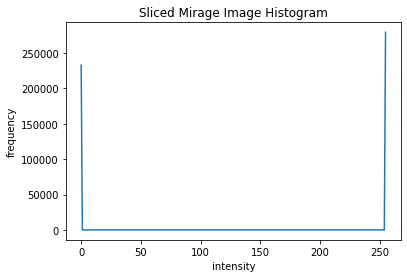

In [9]:
plot_histogram(sliced_image, "Sliced Mirage Image Histogram")

After slicing, our image should contains `0` and `255` intensity values. Now let us compare side by side both our raw image and sliced image.

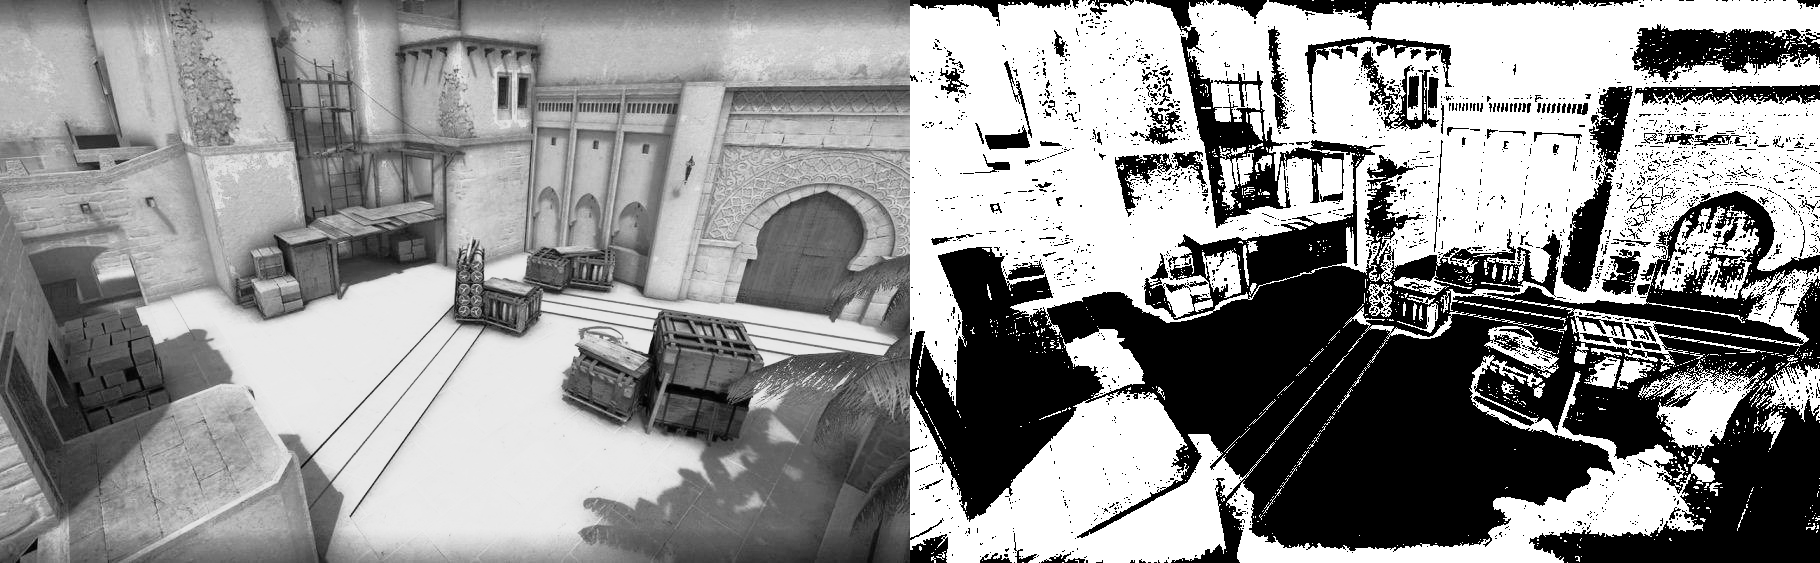

In [10]:
side_to_side = cv.hconcat((image, sliced_image))
cv_imshow(side_to_side)

Cool. We move on to our second experimentation.

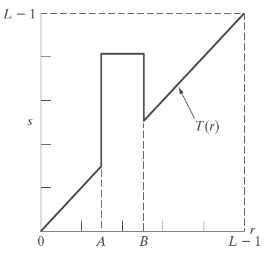

For the second experimentation, we will try to highlight a certain range in between $[A, B]$ as shown on the associated figure above and preserves all the other intensity for our image.

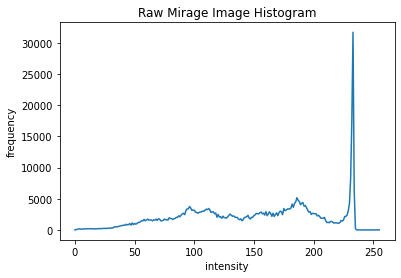

In [11]:
sliced_image = image.copy()
height = sliced_image.shape[0]
width = sliced_image.shape[1]

for i in range(height):
  for j in range(width):
    pixel = sliced_image[i][j]
    if pixel >= 150 and pixel <= 200:
      sliced_image[i][j] = 255

plot_histogram(image, "Raw Mirage Image Histogram")

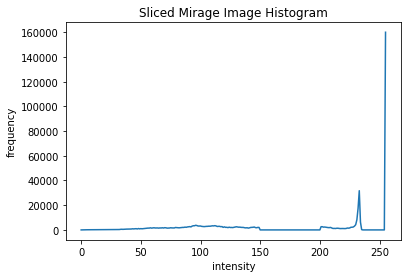

In [12]:
plot_histogram(sliced_image, "Sliced Mirage Image Histogram")

After slicing, we can visually see that the `255` intensity value spikes as we highlighted a certain range of intensity values for our image.

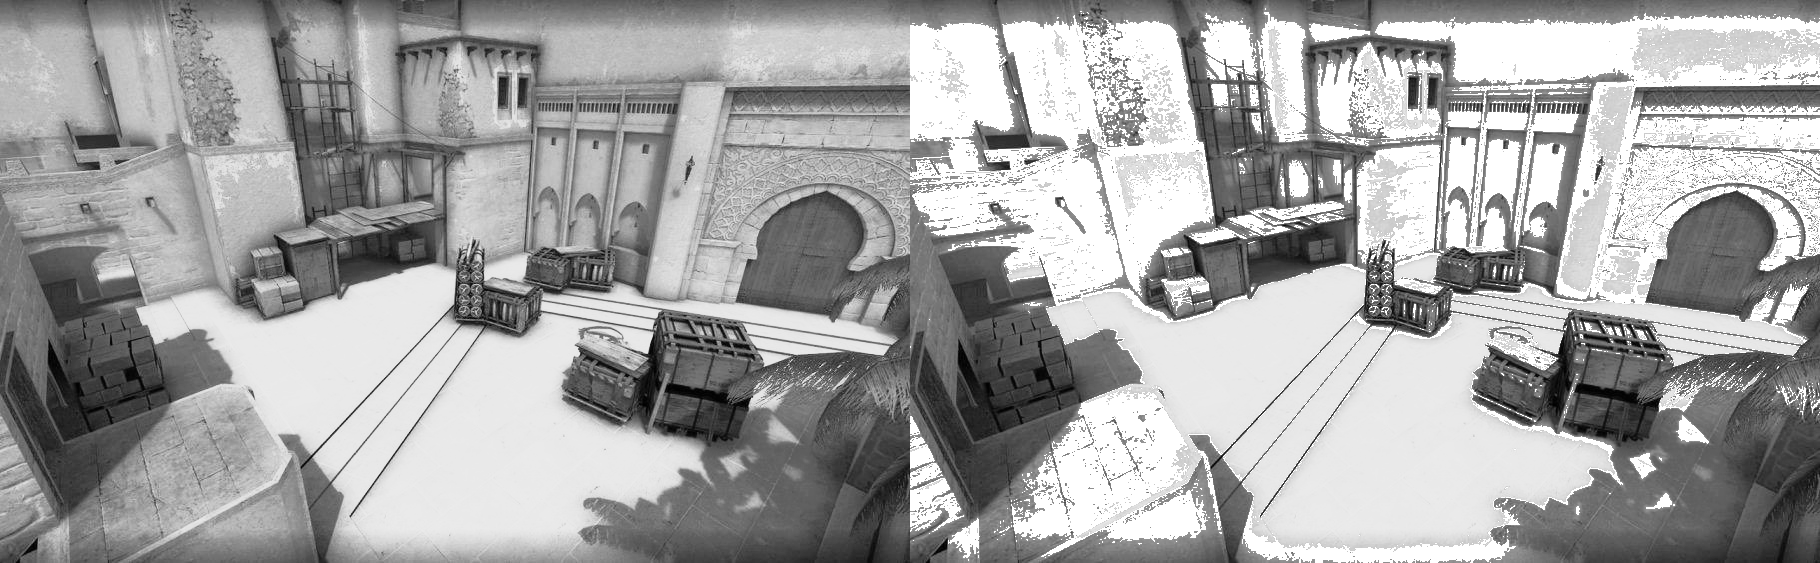

In [13]:
side_to_side = cv.hconcat((image, sliced_image))
cv_imshow(side_to_side)

Look at the details, way to go!